## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below. <br><br>
**manufacturer_name:** The name of the car manufacturer. <br>
**model_name:** The name of the car model. <br>
**transmission:** The type of transmission the car has. <br>
**color:** The body color of the car. <br>
**odometer_value:** The distance travelled by the vehicle in kilometers. <br>
**year_produced:** The year the car was produced. <br>
**engine_fuel:** The fuel type of the engine of the car. <br>
**engine_has_gas:** Whether or not the car has a propane tank with tubing. <br>
**engine_type:** The engine type of the car. <br>
**engine_capacity:** Capacity of the engine in liters. <br>
**body_type:** The of body the car has. <br>
**has_warranty:** Whether the car has warranty. <br>
**state:** The state of the car. (new, owned, etc.) <br>
**drivetrain:** Type of drivetrain. (front, rear, all) <br>
**feature_1 - feature_9:** These features are boolean values about properties of the car. <br>
**duration_listed:** The number of days the car is listed in the catalog. <br>
**price_usd:** Price of the car in USD. <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_regression

import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Embedding, concatenate, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

from sklearn.preprocessing import power_transform
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn_pandas import DataFrameMapper

import plotly
from plotly.offline import init_notebook_mode, iplot

import plotly.graph_objs as go
#import squarify # for tree maps
%matplotlib inline

In [2]:
np.random.seed(100)
tf.random.set_seed(100)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('public_cars.csv')

In [5]:
pd.set_option('max_columns',None)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,hatchback,False,owned,front,True,False,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,minivan,False,owned,front,False,True,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,minivan,False,owned,front,False,False,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,universal,False,owned,front,False,True,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,sedan,False,owned,front,False,False,False,False,False,False,False,False,False,True,160,1600.0


In [6]:
df.shape

(30824, 26)

In [7]:
df.nunique()

manufacturer_name      55
model_name           1070
transmission            2
color                  12
odometer_value       5086
year_produced          62
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        59
body_type              12
has_warranty            2
state                   3
drivetrain              3
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       733
price_usd            2379
dtype: int64

In [8]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

### From the domain perspective all the columns are important

In [9]:
df.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [10]:
# Engine Capacity has 8 null values

In [11]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed', 'price_usd'],
      dtype='object')

In [12]:
Cat_cols = ['manufacturer_name', 'model_name', 'transmission', 'color','engine_fuel','engine_type','body_type', 'state','drivetrain']

In [13]:
df['manufacturer_name'].value_counts().head(10)

Volkswagen       3406
Opel             2193
BMW              2091
Ford             2080
Renault          1999
Audi             1972
Mercedes-Benz    1807
Peugeot          1529
Citroen          1236
Nissan           1084
Name: manufacturer_name, dtype: int64

In [14]:
for i in df.columns:
    print('Column: {}'.format(i))
    print('Number of unique variables: {} \n'.format(df[i].nunique()))
    print("Value Counts of '{}'".format(i))
    print(df[i].value_counts().head(),'\n')
    print('**********************************************************\n')

Column: manufacturer_name
Number of unique variables: 55 

Value Counts of 'manufacturer_name'
Volkswagen    3406
Opel          2193
BMW           2091
Ford          2080
Renault       1999
Name: manufacturer_name, dtype: int64 

**********************************************************

Column: model_name
Number of unique variables: 1070 

Value Counts of 'model_name'
Passat    1153
Astra      595
Golf       577
A6         546
Mondeo     503
Name: model_name, dtype: int64 

**********************************************************

Column: transmission
Number of unique variables: 2 

Value Counts of 'transmission'
mechanical    20493
automatic     10331
Name: transmission, dtype: int64 

**********************************************************

Column: color
Number of unique variables: 12 

Value Counts of 'color'
black     6162
silver    5480
blue      4671
white     3390
grey      2962
Name: color, dtype: int64 

**********************************************************

Column

In [15]:
df[df['manufacturer_name'] == 'Saab']['model_name'].unique()

array(['9000', '900', '05-Sep', '03-Sep', '9 - 7X', '9-2X'], dtype=object)

In [16]:
df['model_name'] = df['model_name'].replace(['3-Sep','5-Sep','9 - 7X'],['9-3','9-5','9-7X'])

In [17]:
df['model_age'] = 2020 - df['year_produced'] + 1 #(including that year)
df.drop('year_produced', axis = 1, inplace=True)

In [18]:
df = df[['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'engine_fuel', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'duration_listed', 'model_age','price_usd']]

In [19]:
for x in df['manufacturer_name'].unique():
    print('Manufacturer: ', x, '\n')
    print(df[df['manufacturer_name']==x]['model_name'].value_counts().head())
    print('*****************************\n')

Manufacturer:  Ford 

Mondeo     503
Focus      303
Transit    247
Escort     162
Galaxy     153
Name: model_name, dtype: int64
*****************************

Manufacturer:  Dodge 

Caravan          69
Stratus          48
Grand Caravan    35
Caliber          26
Intrepid         18
Name: model_name, dtype: int64
*****************************

Manufacturer:  Mazda 

626     274
6       223
323     181
3       115
CX-7     55
Name: model_name, dtype: int64
*****************************

Manufacturer:  Audi 

A6     546
A4     400
100    306
80     234
A8     126
Name: model_name, dtype: int64
*****************************

Manufacturer:  Volkswagen 

Passat    1153
Golf       577
Jetta      186
T4         163
Touran     161
Name: model_name, dtype: int64
*****************************

Manufacturer:  Opel 

Astra     595
Vectra    469
Omega     291
Zafira    287
Corsa     117
Name: model_name, dtype: int64
*****************************

Manufacturer:  Volvo 

S80     99
XC90    98
S60     

In [20]:
df.describe(include = ['int64','float64'])

,odometer_value,engine_capacity,duration_listed,model_age,price_usd
count,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,2.054232,80.344407,18.060310,6630.598604
std,135760.720763,0.667535,112.656926,8.048786,6412.213626
min,0.000000,0.200000,0.000000,2.000000,1.000000
25%,158146.500000,1.600000,23.000000,12.000000,2145.857500
50%,250000.000000,2.000000,59.000000,18.000000,4800.000000
75%,325000.000000,2.300000,91.000000,23.000000,8950.000000
max,1000000.000000,7.500000,2232.000000,71.000000,50000.000000


In [21]:
df.describe(exclude=['int64','float64'])

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_has_gas,engine_type,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,55,1070,2,12,6,2,3,12,2,3,3,2,2,2,2,2,2,2,2,2,2
top,Volkswagen,Passat,mechanical,black,gasoline,False,gasoline,sedan,False,owned,front,False,True,False,False,False,False,False,False,False,True
freq,3406,1153,20493,6162,19259,29754,20511,10433,30457,30154,22193,23756,18764,23945,22341,23417,19916,25599,22767,18043,17787


In [22]:
df.loc[df['price_usd'] < 100,'price_usd'] = 100
df.describe(include = ['int64','float64'])

,odometer_value,engine_capacity,duration_listed,model_age,price_usd
count,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,2.054232,80.344407,18.060310,6630.624736
std,135760.720763,0.667535,112.656926,8.048786,6412.186820
min,0.000000,0.200000,0.000000,2.000000,100.000000
25%,158146.500000,1.600000,23.000000,12.000000,2145.857500
50%,250000.000000,2.000000,59.000000,18.000000,4800.000000
75%,325000.000000,2.300000,91.000000,23.000000,8950.000000
max,1000000.000000,7.500000,2232.000000,71.000000,50000.000000


In [23]:
object_cols = list(df.select_dtypes('object').columns)
print(object_cols)
cat_cols = []
for x in object_cols:
    if df[x].nunique() < 5:
        cat_cols.append(x)
        

print(cat_cols)
object_cols = [i for i in object_cols if i not in cat_cols]
print(object_cols)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']
['transmission', 'engine_type', 'state', 'drivetrain']
['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type']


In [24]:
for x in cat_cols:
    print(df[x].unique())
    print('\n')

['mechanical' 'automatic']


['gasoline' 'diesel' 'electric']


['owned' 'emergency' 'new']


['front' 'rear' 'all']




In [25]:
df[cat_cols] = df[cat_cols].astype('category')

In [26]:
bool_cols = df.select_dtypes(['bool']).columns
bool_cols
for x in bool_cols:
    df[x] = df[x].replace([True,False],[1,0])

In [27]:
df.nunique()

manufacturer_name      55
model_name           1070
transmission            2
color                  12
odometer_value       5086
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        59
body_type              12
has_warranty            2
state                   3
drivetrain              3
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       733
model_age              62
price_usd            2375
dtype: int64

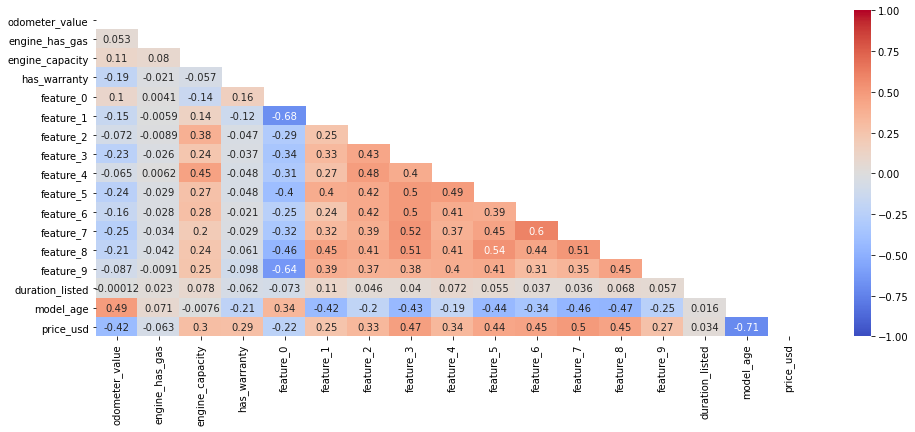

In [28]:
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,6))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

In [29]:
df.describe(exclude = ['object','category'])

,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.00000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,0.034713,2.054232,0.011906,0.229302,0.608746,0.223170,0.275208,0.240300,0.35388,0.169511,0.261387,0.414644,0.577050,80.344407,18.060310,6630.624736
std,135760.720763,0.183055,0.667535,0.108466,0.420391,0.488039,0.416378,0.446626,0.427272,0.47818,0.375209,0.439398,0.492669,0.494036,112.656926,8.048786,6412.186820
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,100.000000
25%,158146.500000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000,12.000000,2145.857500
50%,250000.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,59.000000,18.000000,4800.000000
75%,325000.000000,0.000000,2.300000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,91.000000,23.000000,8950.000000
max,1000000.000000,1.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2232.000000,71.000000,50000.000000


In [30]:
df.describe(include=['object','category'])

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain
count,30824,30824,30824,30824,30824,30824,30824,30824,30824
unique,55,1070,2,12,6,3,12,3,3
top,Volkswagen,Passat,mechanical,black,gasoline,gasoline,sedan,owned,front
freq,3406,1153,20493,6162,19259,20511,10433,30154,22193


## Categorical Embedding on Object type features

In [31]:
object_cols

['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type']

In [32]:
le_dict= {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  #Save a mapping of categorical columns values and its transforamtion - needed 
  #later on for mapping purposes
    le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [33]:
print(le_dict['manufacturer_name'])

{'Acura': 0, 'Alfa Romeo': 1, 'Audi': 2, 'BMW': 3, 'Buick': 4, 'Cadillac': 5, 'Chery': 6, 'Chevrolet': 7, 'Chrysler': 8, 'Citroen': 9, 'Dacia': 10, 'Daewoo': 11, 'Dodge': 12, 'Fiat': 13, 'Ford': 14, 'Geely': 15, 'Great Wall': 16, 'Honda': 17, 'Hyundai': 18, 'Infiniti': 19, 'Iveco': 20, 'Jaguar': 21, 'Jeep': 22, 'Kia': 23, 'LADA': 24, 'Lancia': 25, 'Land Rover': 26, 'Lexus': 27, 'Lifan': 28, 'Lincoln': 29, 'Mazda': 30, 'Mercedes-Benz': 31, 'Mini': 32, 'Mitsubishi': 33, 'Nissan': 34, 'Opel': 35, 'Peugeot': 36, 'Pontiac': 37, 'Porsche': 38, 'Renault': 39, 'Rover': 40, 'Saab': 41, 'Seat': 42, 'Skoda': 43, 'SsangYong': 44, 'Subaru': 45, 'Suzuki': 46, 'Toyota': 47, 'Volkswagen': 48, 'Volvo': 49, 'ВАЗ': 50, 'ГАЗ': 51, 'ЗАЗ': 52, 'Москвич': 53, 'УАЗ': 54}


In [34]:
input_df_list = []
for x in list(object_cols):
    input_df_list.append(df[x].values)

In [35]:
target = df['price_usd'].values

In [36]:
input_models = []

output_embeddings = []

for x in object_cols:
    cat_embed_name = x + '_embedding'
    no_of_unique_cat = df[x].nunique()
    embedding_size = 10
    input_model = Input(shape=(1,), name = x + '_input')
    embed = Embedding(input_dim = no_of_unique_cat,output_dim = embedding_size, name = cat_embed_name)(input_model)
    output_model = Reshape(target_shape = (embedding_size,))(embed)
    
    input_models.append(input_model)
    output_embeddings.append(output_model)

In [37]:
input_models

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'manufacturer_name_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'model_name_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'color_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'engine_fuel_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'body_type_input')>]

In [38]:
output_embeddings

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape_3')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'reshape_4')>]

In [39]:
embed_layer = concatenate(output_embeddings)
x = Dense(512, kernel_initializer='glorot_normal', activation = 'relu')(embed_layer)
x = Dense(256, kernel_initializer='glorot_normal', activation = 'relu')(x)
x = Dense(128, kernel_initializer='glorot_normal', activation = 'relu')(x)
x = Dense(64, kernel_initializer='glorot_normal', activation = 'relu')(x)
x = Dense(32, kernel_initializer='glorot_normal', activation = 'relu')(x)
x = Dense(16, kernel_initializer='glorot_normal', activation = 'relu')(x)
x = Dense(2, kernel_initializer='glorot_normal', activation = 'relu')(x)
output = Dense(1, activation='linear')(x)

In [40]:
model = Model(inputs = input_models,outputs = output)
model.compile(loss=tf.keras.losses.MeanSquaredError(name='MSE'), \
   optimizer= tf.keras.optimizers.Adam(),\
   metrics=tf.keras.metrics.MeanAbsoluteError(name='MAE'))

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
manufacturer_name_input (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
model_name_input (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
color_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
engine_fuel_input (InputLayer)  [(None, 1)]          0                                            
______________________________________________________________________________________________

In [42]:
history  =  model.fit(input_df_list, target, validation_split=0.2,\
                      epochs =  10, batch_size = 64, verbose= 2,shuffle=True)

Epoch 1/10
386/386 - 4s - loss: 33956056.0000 - MAE: 3799.9712 - val_loss: 18160718.0000 - val_MAE: 2739.8481
Epoch 2/10
386/386 - 1s - loss: 18070068.0000 - MAE: 2699.3835 - val_loss: 16702736.0000 - val_MAE: 2621.8704
Epoch 3/10
386/386 - 1s - loss: 16916594.0000 - MAE: 2607.4592 - val_loss: 16421708.0000 - val_MAE: 2658.9985
Epoch 4/10
386/386 - 1s - loss: 16328335.0000 - MAE: 2571.8169 - val_loss: 16017234.0000 - val_MAE: 2569.9631
Epoch 5/10
386/386 - 1s - loss: 15957469.0000 - MAE: 2535.4277 - val_loss: 16118796.0000 - val_MAE: 2505.7478
Epoch 6/10
386/386 - 1s - loss: 15693920.0000 - MAE: 2515.9871 - val_loss: 15810015.0000 - val_MAE: 2502.0491
Epoch 7/10
386/386 - 1s - loss: 15493901.0000 - MAE: 2485.6323 - val_loss: 15805679.0000 - val_MAE: 2567.1982
Epoch 8/10
386/386 - 1s - loss: 15363533.0000 - MAE: 2473.7737 - val_loss: 15888346.0000 - val_MAE: 2600.8447
Epoch 9/10
386/386 - 1s - loss: 15192473.0000 - MAE: 2454.4917 - val_loss: 15731486.0000 - val_MAE: 2495.4756
Epoch 10/1

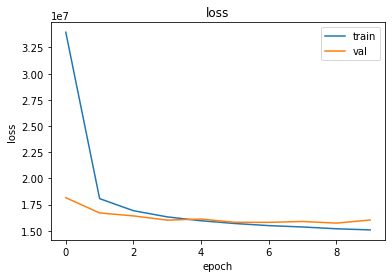

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [44]:
print(model.get_layer('manufacturer_name_embedding').get_weights()[0][0])
print(model.get_layer('manufacturer_name_embedding').get_weights()[0].shape)

[-0.07232366  0.03426206  0.02594332  0.00518443 -0.08620009  0.013215
  0.11194028  0.06697926 -0.06130441 -0.01485613]
(55, 10)


### Converting the values into dataframe and attaching them to the dataframe

In [45]:
manufacturer_name_embeddings = {ind: model.get_layer('manufacturer_name_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['manufacturer_name'].items()}
manufacturer_name_df = pd.DataFrame(manufacturer_name_embeddings)
manufacturer_name_df = manufacturer_name_df.T.reset_index()
manufacturer_name_df = manufacturer_name_df.rename(columns = {'index': 'index_manu', 0: 'manu0',1: 'manu1',2: 'manu2',\
                       3: 'manu3',4: 'manu4',5: 'manu5', 6: 'manu6', 7: 'manu7', 8: 'manu8', 9: 'manu9'})
manufacturer_name_df.head()

,index_manu,manu0,manu1,manu2,manu3,manu4,manu5,manu6,manu7,manu8,manu9
0,0,-0.072324,0.034262,0.025943,0.005184,-0.086200,0.013215,0.111940,0.066979,-0.061304,-0.014856
1,1,0.056432,-0.072361,-0.083547,0.053354,0.042397,-0.112533,-0.141790,-0.023227,0.032708,0.098215
2,2,-0.047402,0.040167,0.072199,-0.019894,-0.029729,0.033111,-0.014305,-0.000109,-0.003665,-0.008479
3,3,-0.108156,0.110551,0.116410,-0.057961,-0.137132,0.053703,0.122737,0.125437,-0.134271,-0.132223
4,4,-0.079866,0.100254,0.139300,-0.099983,-0.056115,0.157005,-0.019441,0.096885,-0.063741,-0.117990


In [46]:
model_name_embeddings = {ind: model.get_layer('model_name_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['model_name'].items()}
model_name_df = pd.DataFrame(model_name_embeddings).T.reset_index()
model_name_df = model_name_df.rename(columns = {'index': 'index_model', 0: 'model0',1: 'model1',2: 'model2',\
                       3: 'model3',4: 'model4',5: 'model5', 6: 'model6', 7: 'model7', 8: 'model8', 9: 'model9'})
model_name_df.head()

,index_model,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9
0,0,0.033788,-0.034195,0.024067,0.026796,-0.016314,-0.046762,-0.011576,0.023236,0.028215,0.077439
1,1,0.050870,-0.083780,-0.011926,-0.010360,0.048838,0.009700,-0.062648,-0.063945,-0.010779,-0.112614
2,2,0.149663,-0.146412,0.092121,0.152640,0.133305,-0.210599,-0.112687,-0.190013,0.156914,-0.089597
3,3,0.010166,-0.010361,0.047565,0.033529,0.001011,-0.031005,-0.031500,-0.033338,-0.000615,-0.049766
4,4,0.105240,-0.068702,0.092872,0.132151,0.125131,-0.142234,-0.099118,-0.181694,0.152046,-0.015671


In [47]:
color_embeddings = {ind: model.get_layer('color_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['color'].items()}
color_df = pd.DataFrame(color_embeddings).T.reset_index()
color_df = color_df.rename(columns = {'index': 'index_col', 0: 'col0',1: 'col1',2: 'col2',\
                       3: 'col3',4: 'col4',5: 'col5', 6: 'col6', 7: 'col7', 8: 'col8', 9: 'col9'})

color_df.head()

,index_col,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,0,-0.075702,-0.156245,-0.145429,0.090654,-0.186137,-0.084050,-0.093119,0.038445,-0.085695,-0.056960
1,1,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.033280,-0.022770,0.040786,0.002439,-0.026200
2,2,-0.117892,-0.210016,-0.197555,0.170530,-0.182923,-0.194381,-0.216110,0.087858,-0.205750,-0.195737
3,3,0.174530,0.113811,0.044811,-0.100471,0.101669,0.141554,0.099462,-0.114075,0.091383,0.064332
4,4,-0.081129,-0.132509,-0.092068,0.109757,-0.153437,-0.071072,-0.110309,0.044937,-0.045956,-0.052896


In [48]:
engine_fuel_embeddings = {ind: model.get_layer('engine_fuel_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['engine_fuel'].items()}
engine_fuel_df = pd.DataFrame(engine_fuel_embeddings).T.reset_index()
engine_fuel_df = engine_fuel_df.rename(columns = {'index': 'index_ef', 0: 'ef0',1: 'ef1',2: 'ef2',\
                       3: 'ef3',4: 'ef4',5: 'ef5', 6: 'ef6', 7: 'ef7', 8: 'ef8', 9: 'ef9'})

engine_fuel_df.head()

,index_ef,ef0,ef1,ef2,ef3,ef4,ef5,ef6,ef7,ef8,ef9
0,0,0.018710,-0.018039,-0.113816,0.085678,-0.041616,0.127864,-0.113359,0.129060,-0.119266,0.059089
1,1,0.256214,-0.187284,-0.246061,0.251921,-0.187207,0.218789,-0.218382,0.262641,-0.257646,0.196393
2,2,-0.359932,-0.312343,0.126230,-0.122775,-0.076540,-0.323181,0.013919,-0.057855,0.100705,-0.045472
3,3,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607
4,4,-0.145860,0.073005,0.159817,-0.212455,0.159196,-0.175638,0.211697,-0.220850,0.130678,-0.142685


In [49]:
body_type_embeddings = {ind: model.get_layer('body_type_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['body_type'].items()}
body_type_df = pd.DataFrame(body_type_embeddings).T.reset_index()
body_type_df = body_type_df.rename(columns = {'index': 'index_bt', 0: 'bt0',1: 'bt1',2: 'bt2',\
                       3: 'bt3',4: 'bt4',5: 'bt5', 6: 'bt6', 7: 'bt7', 8: 'bt8', 9: 'bt9'})

body_type_df.head()

,index_bt,bt0,bt1,bt2,bt3,bt4,bt5,bt6,bt7,bt8,bt9
0,0,-0.121690,-0.036562,0.109829,0.195269,-0.184159,0.051267,0.166267,-0.212036,-0.150779,-0.183009
1,1,-0.038959,0.067942,0.004967,-0.004569,-0.028182,0.010834,0.004663,0.014299,-0.014120,-0.041151
2,2,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706
3,3,0.099013,0.233629,0.017941,-0.071280,0.076967,-0.333136,-0.101051,0.069159,0.047938,0.122738
4,4,-0.098032,0.051226,0.078450,0.058867,-0.138131,0.058280,0.074774,-0.113339,-0.070983,-0.072188


In [50]:
print(manufacturer_name_df.shape)
print(model_name_df.shape)
print(color_df.shape)
print(engine_fuel_df.shape)
print(body_type_df.shape)

(55, 11)
(1070, 11)
(12, 11)
(6, 11)
(12, 11)


In [51]:
new_df = pd.merge(df,manufacturer_name_df,how = 'inner', left_on='manufacturer_name', right_on='index_manu')
new_df.drop(['manufacturer_name', 'index_manu'], axis = 1, inplace = True)
print(new_df.shape)

new_df = pd.merge(new_df,model_name_df,how = 'inner', left_on='model_name', right_on='index_model')
new_df.drop(['model_name', 'index_model'], axis = 1, inplace = True)
print(new_df.shape)

new_df = pd.merge(new_df,color_df,how = 'inner', left_on='color', right_on='index_col')
new_df.drop(['color', 'index_col'], axis = 1, inplace = True)
print(new_df.shape)

new_df = pd.merge(new_df,engine_fuel_df,how = 'inner', left_on='engine_fuel', right_on='index_ef')
new_df.drop(['engine_fuel', 'index_ef'], axis = 1, inplace = True)
print(new_df.shape)

new_df = pd.merge(new_df,body_type_df,how = 'inner', left_on='body_type', right_on='index_bt')
new_df.drop(['body_type', 'index_bt'], axis = 1, inplace = True)
print(new_df.shape)

(30824, 35)
(30824, 44)
(30824, 53)
(30824, 62)
(30824, 71)


In [52]:
new_df.head()

,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,price_usd,manu0,manu1,manu2,manu3,manu4,manu5,manu6,manu7,manu8,manu9,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,ef0,ef1,ef2,ef3,ef4,ef5,ef6,ef7,ef8,ef9,bt0,bt1,bt2,bt3,bt4,bt5,bt6,bt7,bt8,bt9
0,mechanical,245000,0,gasoline,1.6,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,15,4250.0,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706
1,mechanical,298000,0,gasoline,1.4,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,14,4000.0,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706
2,mechanical,170000,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,0,4,17,3400.0,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706
3,automatic,231000,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,1,111,16,4800.0,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706
4,automatic,106300,0,gasoline,1.6,0,owned,front,0,1,0,0,0,0,0,0,0,0,230,14,5550.0,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706


In [53]:
re_cols = ['transmission', 'odometer_value', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'has_warranty', 'state', 'drivetrain', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed',
       'model_age', 'manu0', 'manu1', 'manu2', 'manu3', 'manu4',
       'manu5', 'manu6', 'manu7', 'manu8', 'manu9', 'model0', 'model1',
       'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8',
       'model9', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6',
       'col7', 'col8', 'col9', 'ef0', 'ef1', 'ef2', 'ef3', 'ef4', 'ef5', 'ef6',
       'ef7', 'ef8', 'ef9', 'bt0', 'bt1', 'bt2', 'bt3', 'bt4', 'bt5', 'bt6',
       'bt7', 'bt8', 'bt9','price_usd']

# Bringing the label column to the right end for my convenience
new_df = new_df[re_cols]
new_df.head()

,transmission,odometer_value,engine_has_gas,engine_type,engine_capacity,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,model_age,manu0,manu1,manu2,manu3,manu4,manu5,manu6,manu7,manu8,manu9,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,ef0,ef1,ef2,ef3,ef4,ef5,ef6,ef7,ef8,ef9,bt0,bt1,bt2,bt3,bt4,bt5,bt6,bt7,bt8,bt9,price_usd
0,mechanical,245000,0,gasoline,1.6,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,15,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706,4250.0
1,mechanical,298000,0,gasoline,1.4,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,14,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706,4000.0
2,mechanical,170000,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,0,4,17,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706,3400.0
3,automatic,231000,0,gasoline,1.4,0,owned,front,0,1,0,0,0,0,0,0,0,1,111,16,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706,4800.0
4,automatic,106300,0,gasoline,1.6,0,owned,front,0,1,0,0,0,0,0,0,0,0,230,14,0.034799,0.038013,-0.033522,0.047754,-0.033464,0.003847,0.045863,0.021198,0.041997,-0.032948,-0.009683,0.024718,-0.027127,-0.00938,-0.104503,-0.020731,-0.008107,0.038866,-0.073928,0.160847,-0.032649,-0.000247,-0.042971,0.010498,0.006716,-0.03328,-0.02277,0.040786,0.002439,-0.0262,0.067696,-0.077143,-0.031211,0.062596,-0.068431,0.021051,-0.060838,0.041429,-0.015709,0.028607,0.059528,0.095835,0.004169,-0.098097,0.012783,-0.127191,-0.079061,0.085959,0.068954,0.098706,5550.0
